<a href="https://colab.research.google.com/github/Herrera00/CIENCIA-DATOS-2025/blob/main/20_10_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis exploratorio de datos eda
Conjunto de recnicas estadisticas cuyo objetivo es explorar, describbir y resumir la naturaleza de los datos y comprender la relaciones existentes entre las variables de interes utilizando la comprencion del conjunto de datos.

##pasos del eda
1. **realizar un analisis descriptivo de las variables**
2. **re-ajustar tipo de variable que no sean consistentes en el momento de realizar las operaciones**
3. **detectar y tratar datos ausentes (NaN) que nos permitira procesar adecuadamente variables numericas**
4. **identificar datos atipicos y tratarlos de forma adecuda**. esto mitigara la distorsion de futuos analisis estadisticos
5. **realizar un examen mnumerico y grafico de las relaciones


pergunta objetivo:
Jack se salvaba si Rose le hubiera hecho campito?

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df=pd.read_csv ("https://raw.githubusercontent.com/nt246/NTRES-6100-data-science/master/datasets/Titanic.csv")

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###Dicionario
**survived**: 1=sobrevivoo 2=no sobrevivio

**sibSp**: número de hermanos/esposos a bordo del Titani

**parch**:número de padres/hijos a bordo del Titanic




1. Analisis descriptivo

tomar cada una de las caracteristicas y analizarla

In [20]:
def bar_char(feature):
  survived=df[df['Survived']==1][feature].value_counts()
  dead=df[df["Survived"]==0][feature].value_counts()
  test=pd.DataFrame([survived,dead])
  test.index=['Survived','Fallecidos']
  test.plot(kind="bar",stacked=True,figsize=(10,5))

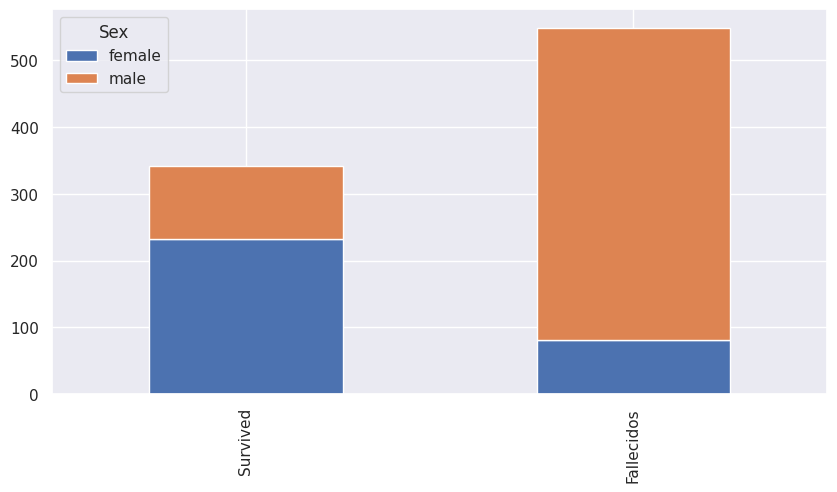

In [22]:
bar_char("Sex")

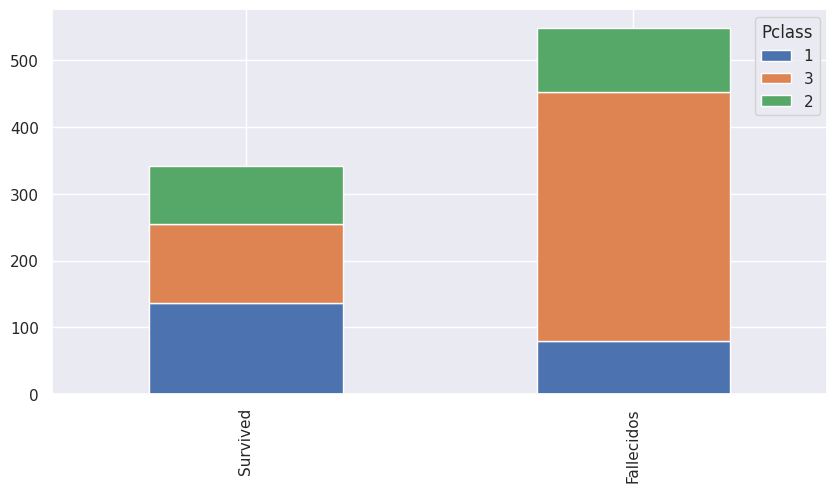

In [23]:
bar_char("Pclass")

Pclass 1 tiene mayor probabiolidad de sobrevivir con respecto a Pclass 3

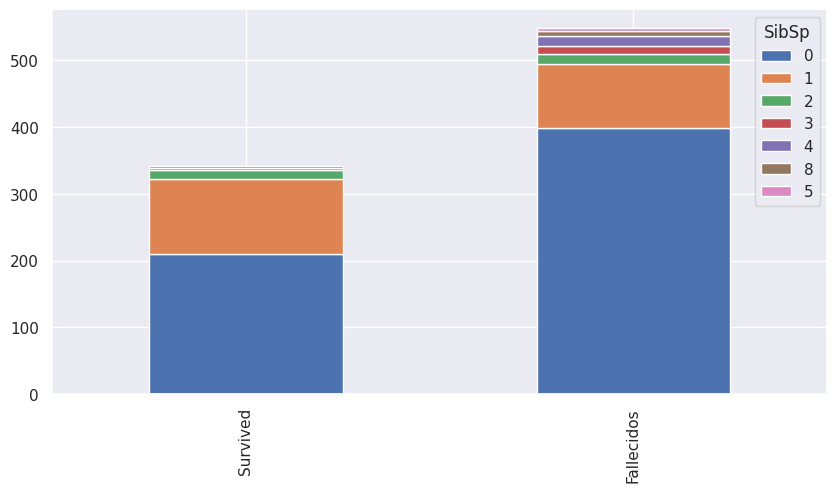

In [24]:
bar_char("SibSp")

las personas solteras presentan menor probabilidad de superviviencia en comparacion con aquellas casadas o con familia.

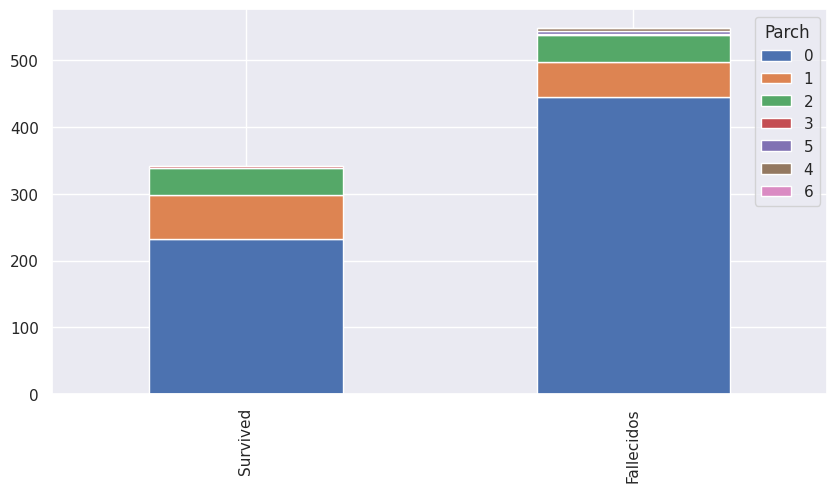

In [27]:
bar_char("Parch")

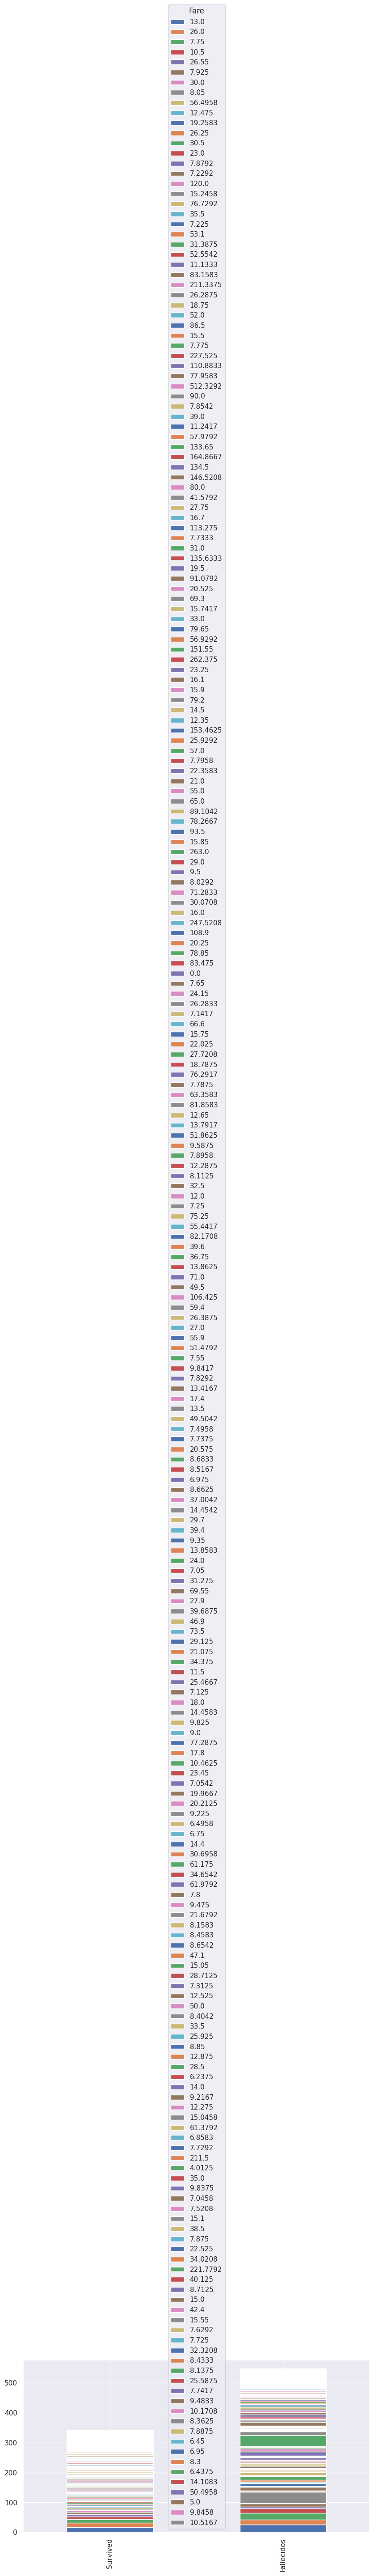

In [25]:
bar_char("Fare")

##ingenieria de caracteriscticas
Es el proceso de usar el dominio del conocmiento para crear nuevas caracteristicas (feature vectors) que logre que los algoritmos de machine learning funcionanen adecuadamente

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##2. creando feature vectors

In [30]:
def extract_title(data):
  titles=data["Name"].str.extract("([A-Za-z]+)\.", expand=True)
  return titles


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2415557267.py:2: SyntaxWarning: invalid escape sequence '\.'
  titles=data["Name"].str.extract("([A-Za-z]+)\.", expand=True)


In [32]:
df["title"]=extract_title(df)

###2.1 Creadndo un mapeo de titulos

Para ello reemplazamos los titulos con los

*Mr: 0

*Miss: 1

*Mrs: 2

*Otros:3

In [51]:
def replace_titles(data):
  title_mapping={"Mr":0, "Miss":1,"Mrs":2}
  data ["Title"]=data["Title"].map(title_mapping).fillna(3)
  return data

1.#eliminar informacion inncesaria

In [54]:
#eliminar la informacion inncesatia
df.drop(["Name","Ticket","Cabin"],axis=1,inplace=True)

KeyError: "['Name', 'Ticket', 'Cabin'] not found in axis"

In [ ]:
###2.2 reparando la edad
title_age_means=df.groupby("Title")["Age"].mean()
title_age_means

In [55]:
df["Age"]=df.apply(lambda row: title_age_means[row["Title"]] if pd.isnull(row["Age]) else row["Age"]axist=1"]))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (ipython-input-4089128713.py, line 1)

AttributeError: module 'seaborn' has no attribute 'kplot'

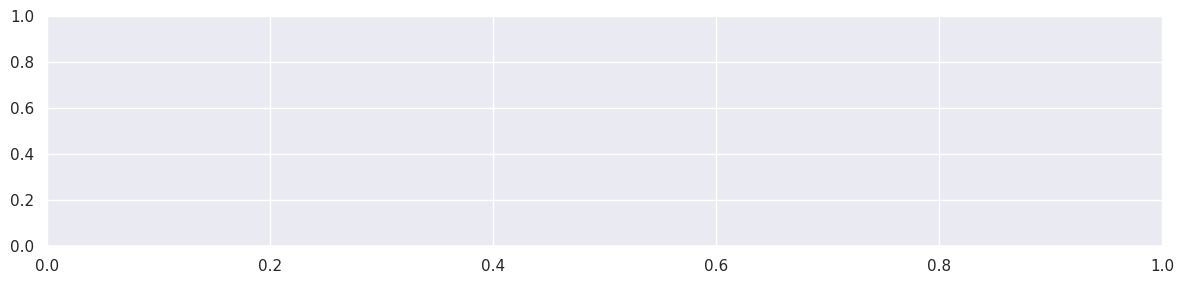

In [56]:
facet=sns. FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kplot,'Age', fill=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.xlim(0,20)
plt.show()